In [1]:
##import modules 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epoch')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs. Epoch')

    plt.show()


In [4]:
train_dir = 'train'
validation_dir = 'valid'

In [20]:
leaf_type_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')  # Assuming 10 leaf types
])


leaf_type_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='sparse')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(128, 128), batch_size=32, class_mode='sparse')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [22]:
leaf_type_history = leaf_type_model.fit(train_generator, epochs=1, validation_data=validation_generator)

2024-03-17 12:31:49.546677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2197/2197 [==============================] - ETA: 0s - loss: 0.8310 - accuracy: 0.7507

2024-03-17 12:39:12.083360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2197/2197 [==============================] - 479s 218ms/step - loss: 0.8310 - accuracy: 0.7507 - val_loss: 0.3434 - val_accuracy: 0.8916


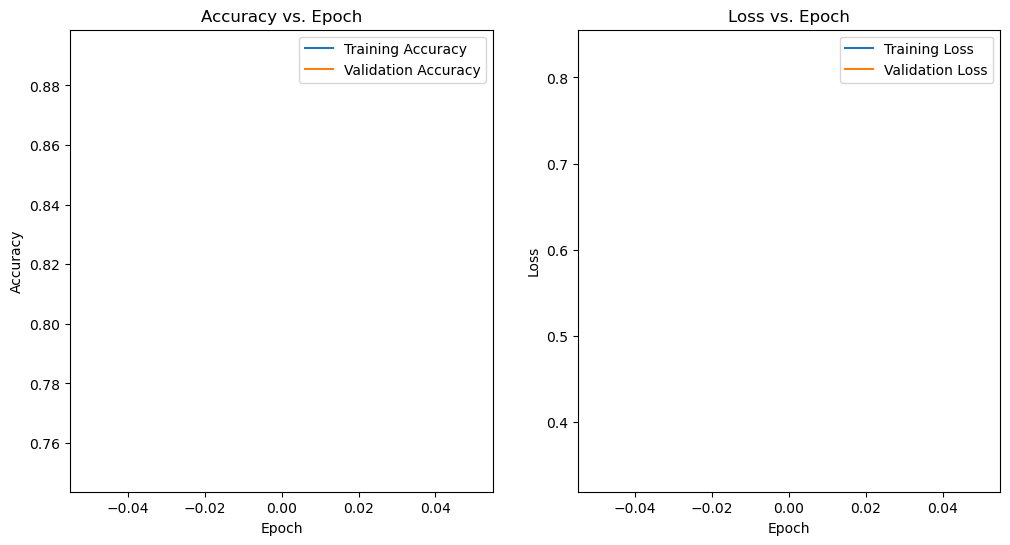

In [23]:
plot_history(leaf_type_history)


In [24]:
leaf_type_model.save('leaf_type_model.h5')

In [25]:
disease_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')  # Assuming 38 disease classes
])

disease_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])


In [27]:
disease_history = disease_model.fit(train_generator, epochs=1, validation_data=validation_generator)


2024-03-17 12:49:13.751246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2197/2197 [==============================] - ETA: 0s - loss: 0.7589 - accuracy: 0.7679

2024-03-17 12:57:02.445762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2197/2197 [==============================] - 506s 230ms/step - loss: 0.7589 - accuracy: 0.7679 - val_loss: 0.3815 - val_accuracy: 0.8788


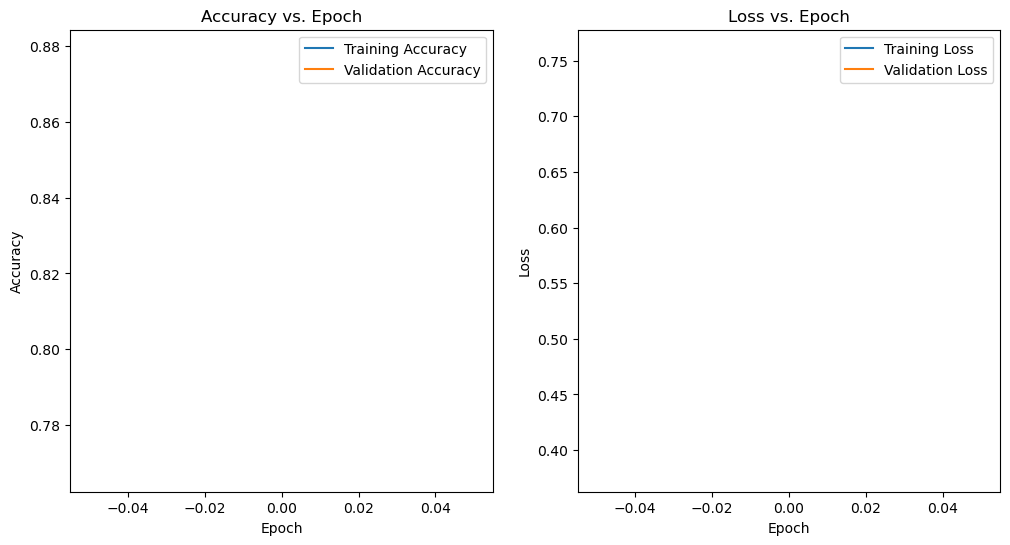

In [28]:
plot_history(disease_history)

In [29]:
disease_model.save('plant_disease_model.h5')

In [31]:
def identify_disease(image_path):
    leaf_type_model = tf.keras.models.load_model('leaf_type_model.h5')
    disease_model = tf.keras.models.load_model('plant_disease_model.h5')

    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch

    # Classify leaf type
    leaf_type = leaf_type_model.predict(img_array)
    leaf_type_index = np.argmax(leaf_type)

    # Predict disease based on leaf type
    prediction = disease_model.predict(img_array)
    predicted_class = np.argmax(prediction)

    return leaf_type_index, predicted_class

In [32]:
image_path = 'test/AppleCedarRust1.JPG'
leaf_type_index, disease_index = identify_disease(image_path)
print(f"Identified leaf type index: {leaf_type_index}")
print(f"Predicted disease index: {disease_index}")

1/1 [==============================] - 0s 51ms/step
Identified leaf type index: 36
Predicted disease index: 19
